## Coding Basics for Researchers - Day 4

*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*


Part of the research process is to conduct data analysis to answer research questions. However, data can come in different shapes and forms. It can be observations, experimental or simulated. Moreover, most of the time, there is a need to transform the data to make sense of it and bring it to the level of analysis.

There are many ways and technologies to harness and manipulate data, from open source solutions to licensed software, from scientific software to GUI programs like Excel. Usually, there is no one-size-fits-all solution for data manipulation. The main advantage of GUI software is the short learning curve. However, the more operations you perform to the data, the more difficult it is to track the changes in the data, resulting in difficulties reproducing the research, either for yourself or for future researchers.

![](https://www.displayr.com/wp-content/uploads/2018/07/reproducibility-small.jpg)

In the following notebook, we will explore why performing data manipulation, transformation and analysis with an open-source programming language, Python, can automate your research, making it reproducible and transparent according to the open science efforts. Furthermore, using jupyter notebooks, one can share and publish data analysis processes. 

![](https://www.maastrichtuniversity.nl/sites/default/files/styles/full_width_image/public/01-maastricht-university-201066-um-openscience-visual-1200x1200.jpg?itok=t1ez-7sl)



---
# 4. Data Analysis with Python
* [4.1. Data Simulation](#4.1)
* [4.2. Data Filtering and Aggregation](#4.2)


When we are doing data analysis, we normally will encounter the following type of data problems:


+ **Oh, I have to simulate some data (Data Simulation)**  

+ **I'm not interested in the whole dataset, only one category (Data Filtering)**  

+ **Well, this is observation level I need analysis level (Data Aggregation)**  

+ **Oh, they gave me the dataset in panel format, and I can't do descriptive statistics (Data Melting/Tidying)**  

+ **Hmm, my observations are identifiers, and the patients are in another catalogue (Data Merging)**  

+ **Survey data has more than one response per entry! (Data Explode/Expand)**  

+ **My data comes in a format I've never seen! (e.g. JSON) (Data Mapping)**  

---
## 4.1. Data Simulation
<a id="4.1">

[NumPy](https://numpy.org/) Is a fundamental package for scientific computing with Python including statistical methds for quantitative analysis.


### List
- A collection of elements in a vector, not nescesarrily of the same type.
- The elements in a list are indexed with 0 being the first index.
- A **List** is the standard ordered-sequence data structure in Python. 
- No external package is needed to create and read **Lists**

A list is created simply by adding elements inside squared brakets`[ ]`

In [1]:
my_list = [11, 12, 33, 40.5]
print(my_list)

[11, 12, 33, 40.5]


And it can contain numbers and strings (words)

In [2]:
weird_list = ['a','b','c','d',1,2,3,2,4]
print(weird_list)

['a', 'b', 'c', 'd', 1, 2, 3, 2, 4]


Once a list is defined, we can access its elements using the indexing method `[ ]` (no space)

In [3]:
weird_list[2]

'c'

We can check that indeed some elements in the same list are not of the same type

In [4]:
print(type(weird_list[2]), type(weird_list[5]))

<class 'str'> <class 'int'>


### Array
- A more efficient way to store an ordered set (vector) of elements of the same type.
- For efficient computation, NumPy arrays are far more suitable 
- To use arrays is necessary to import the Numpy library, e.g., `import numpy as np`

An array is created using the `np.array()` function from NumPy libray (using the same vector)  
**Note:** We need to use both parentheses and square brackets

In [5]:
import numpy as np

my_array = np.array([11, 12, 33])
print(my_array)

[11 12 33]


But introducing different types of data, things may change

In [6]:
np.array([11, 12, 33, "Billie Eilish"])

array(['11', '12', '33', 'Billie Eilish'], dtype='<U21')

Do you see what happened? Python automatically typecast all of the elements in the array to be of the same type. 

The main advantage is that one is able to make math operations easily

In [7]:
# 3 times each element of the array 
3 * my_array

array([33, 36, 99])

In [8]:
# substracting 10
my_array - 10

array([ 1,  2, 23])

An array can be converted to a List by simply using the `list()` function

In [9]:
new_list = list(my_array)

print(new_list)

[11, 12, 33]


### Using SciPy to Generate Data
- The main library to perform Statistical analysis in Python is [SciPy (Scientific Python)](https://www.scipy.org/) 
- SciPy builds on NumPy, and for all basic array handling needs you can use NumPy functions.

**Note:** SciPy library is huge, therefore, we might not want to import the whole library but the functions that we need in that moment, for example, to import the Normal distribution `from scipy.stats import norm` 

#### Generating from normal distribution

- The location (`loc`) parameter specifies the `mean`. The scale (`scale`) parameter specifies the `standard deviation`.
- See [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) for more details

The case can be *The mean daily temperature of Maastricht in April*". Let's suppose that we know the daily temperature in April is distributed Normal with `mean = 11.5` and `sd = 5.5` (i.e. between 6 and 17 Celsius on most of days).

For a `size` of 30 days:

In [10]:
from scipy.stats import norm

X = norm.rvs(loc=11.5, scale=5.5, size=30)
print(X)

[ 4.35399244  8.42812993 13.94800364  7.97472372  8.33418871 19.10565899
  9.55736522  1.19349769  8.46936204  6.15875993  0.69490002 10.8106801
 19.29140015 15.87075136 20.38275169  8.56694277 20.01974534 13.02353422
 14.60180673 17.01234173  3.72307731 12.19794707  8.13305319 15.65111008
  7.671378    4.00594988 10.74426717 13.83196343 10.21548239 16.43192424]


To get an idea of whether or not the data we generated has a Normal dstribution, we can quickly see if it has the expected bell curve by plotting it.

(array([2., 3., 1., 7., 2., 3., 3., 4., 1., 4.]),
 array([ 0.69490002,  2.66368519,  4.63247035,  6.60125552,  8.57004069,
        10.53882585, 12.50761102, 14.47639619, 16.44518135, 18.41396652,
        20.38275169]),
 <BarContainer object of 10 artists>)

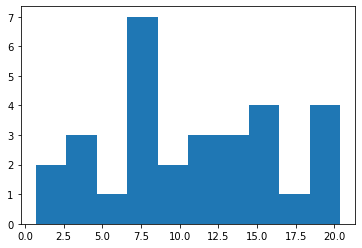

In [11]:
import matplotlib.pyplot as plt

plt.hist(X)

**Note:**
By adding the parameter `random_state` we can reproduce the same generated values if the code is run again, random state is also called **seed**. This number can be anything you want (e.g the number of the beast)

In [12]:
norm.rvs(size=50, random_state=666)

array([ 0.82418808,  0.479966  ,  1.17346801,  0.90904807, -0.57172145,
       -0.10949727,  0.01902826, -0.94376106,  0.64057315, -0.78644317,
        0.60886999, -0.93101185,  0.97822225, -0.73691806, -0.29873262,
       -0.46058737, -1.08879299, -0.57577075, -1.68290077,  0.22918525,
       -1.75662522,  0.84463262,  0.27721986,  0.85290153,  0.1945996 ,
        1.31063772,  1.5438436 , -0.52904802, -0.6564723 , -0.2015057 ,
       -0.70061583,  0.68713795, -0.02607576, -0.82975832,  0.29655378,
       -0.3126795 , -0.61130127, -0.8217515 ,  0.8971227 ,  0.13607861,
       -0.2586548 ,  1.11076564, -0.18842439, -0.04148929, -0.98479191,
       -1.35228176,  0.19432385,  0.26723935, -0.4264737 ,  1.44773506])

#### Generating from a discrete distribution

- Poisson distribution takes as `shape` parameter `mu`. When $\mu = 0$ then method returns 1.0.
- See [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson) for more details

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time. An example can be the "Number of goals scored in a Football match" *. Let's supose that we know `mu = 3` (i.e., 3 goals expected in total).
- We can generate random values that are representative of the real data, we just have to specify the size of the sample that we want.  
With a `size` of 60 matches:

In [13]:
from scipy.stats import poisson

X = poisson.rvs(mu=3, size=30)
print(X)

[1 3 5 3 8 0 4 1 5 4 2 2 4 6 5 0 5 0 1 4 3 2 6 3 0 4 3 5 2 3]


#### Sampling Elements
- The main goal of simple random sampling is to have an unbiased representation of the total population. 

**Note:** There are many other techniques for sampling depending on the experiment, however, we are focusing on simple random sampling using `random.sample()` from the Random library 

Given a set Y of 10 consecutive numbers, we can sample 4 of them making sure that all the elements have the same chances

In [14]:
#import the library
import random 

#this is just a vector represented as a list
Y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

# use the function sample on the vector Y to select 3 elements
random.sample(Y, 4) 

[6, 3, 9, 8]

It is also possible to sample non numerical elements in a vector

In [15]:
# yet another vector
teams_spain = ["Real Madrid", "Villareal", "Barcelona", "Sevilla", "Atletico"] 

random.sample(teams_spain, 2) 

['Barcelona', 'Real Madrid']

Let's create another vector and try to come up with a table that can simulate calendar matches

In [16]:
teams_england = ["M. City", "M. United", "Arsenal", "Liverpool", "Chelsea"] 

Let's use a basic for loop to generate the match number

In [17]:
# getting 1 sample from teams_spain repeated 30 times
samples_spain = [random.sample(teams_spain, 1)[0] for i in range(30)]

# getting 1 sample from teams_england repeated 30 times
samples_england = [random.sample(teams_england, 1)[0] for i in range(30)]

Let's convert it into a table that we can export

In [18]:
import pandas as pd

table = {
    'spanish_team': samples_spain,
    'english_team': samples_england,
    'match_score': X
}

df_matches = pd.DataFrame(table)

In [19]:
df_matches.head()

,spanish_team,english_team,match_score
0,Sevilla,M. City,1
1,Barcelona,M. City,3
2,Atletico,M. United,5
3,Real Madrid,Chelsea,3
4,Sevilla,M. City,8


In [20]:
df_matches.to_excel('simulated_matches.xls')

<ipython-input-20-b6e62df3e0c8>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_matches.to_excel('simulated_matches.xls')


---
## 4.2. Data Filtering and Aggregation
<a id="4.2">


* Load the library with `import pandas as pd`. The alias pd is commonly used for Pandas. (recommended)
* Read a Comma Separated Values (CSV) data file with `pd.read_csv`.
* We will use the Gapminder dataset

#### Data

We will be using the **[Gapminder example](https://www.gapminder.org/fw/world-health-chart/)** a  dataset that is already contained in the Plotly library (how convenient!). The dataset contains information on countries' life expectancy, population and GDP per capita per year. 

This dataset became famous since it has been constantly used for illustrating the power of data visualization, in different conferences, presentations, dashboards and a number of infographics. 
Likewise, we will walk through different tasks using it.

Down here there is a video explaining the **Gapminder** data in an amazing real-life data visualization exercise (click play ►)   
Here is a [link to the video](youtube.com/watch?v=jbkSRLYSojo) as well

#### Descriptions

- **country:** Name of the country **[Zimbabwe = ZWE]**
- **continent:** Name of the comntinent **[Europe]**
- **year:** year**
- **lifeExp:** 
- **pop:** 
- **gdpPercap:** 
- **iso_alpha:** 
- **iso_num:** Country three letters ISO official code **[ZWE = Zimbabwe]**

**Note:** Since Plotly Express is an external library, it is required to be imported (sometimes also installed) before executing. But no worries!! Installing and importing things in a programming environment is quite simple

In [21]:
import plotly.express as px

df = px.data.gapminder()

- Normally, as a convention, people use `df` as the standard name to call the data, df stands for DataFrame, indicating that one should not confuse this data structure with any other
- The columns in a dataframe are the observed variables, and the rows are the observations.
- You can simply display the data by executing the `df` object in a new cell

Use `df.head()` to get the first rows of the dataframe

In [22]:
df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


Use the `df.info()` method to find out more about a dataframe

In [23]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

Use `df.describe()` to get summary statistics about the data

- This method returns a new samaller dataframe with only the summary statistics of the columns that have numerical data. All other columns are ignored.

In [24]:
df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846988,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


With this single line of code, we are able to get some statistical measures, like the Life expectancy of the world `lifeExp` is `59.47` or the max `year` available data is `2007`

### Filtering by creating subsets with Pandas
- Using Pandas it is possible to select entire rows or entire columns from a dataframe.
- Also, select a subset of a dataframe by defined criterion.
- The DataFrame is the way Pandas represents a table
- Pandas is built on top of the NumPy library, which in practice means that most of the methods defined for Numpy Arrays apply to DataFrames.

We can get a slice of the data by using the `df.query()` function to select all the records relating to a specific year. For example, by specifying the corresponding column to filter (`year`) and the desired value (`2007`).

In [25]:
df.query('year == 2007')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


**Note:** This was just a slice of the data, this new subset is not saved anywhere, in order to preserve it, we need to save it in an object. Let's define the `df_2007` object then.

In [26]:
df_2007 = df.query('year == 2007')

df_2007.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8


We can get yet another subset of the `df_2007` subset by using the `df.query()`. Let's filter now by a column that is not numerical, for example `continent` selecting `Europe`. Please note we are using double quotations now!

In [27]:
df_2007_europe = df_2007.query('continent == "Europe" ')

df_2007_europe.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40


Use `DataFrame.sort_values()` to order the values

- This function expects a parameter to indicate which column you want to order by
- The second parameter indicates ascending or descending order (when ascending is `False` it's the same as descending)
- **Note:** This time we are not using `df` anymore since now we are interested only in the European subset

In [28]:
df_2007_europe.sort_values(by='pop', ascending=False)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
575,Germany,Europe,2007,79.406,82400996,32170.374420,DEU,276
1583,Turkey,Europe,2007,71.777,71158647,8458.276384,TUR,792
539,France,Europe,2007,80.657,61083916,30470.016700,FRA,250
1607,United Kingdom,Europe,2007,79.425,60776238,33203.261280,GBR,826
779,Italy,Europe,2007,80.546,58147733,28569.719700,ITA,380
1427,Spain,Europe,2007,80.941,40448191,28821.063700,ESP,724
1235,Poland,Europe,2007,75.563,38518241,15389.924680,POL,616
1283,Romania,Europe,2007,72.476,22276056,10808.475610,ROU,642
1091,Netherlands,Europe,2007,79.762,16570613,36797.933320,NLD,528
599,Greece,Europe,2007,79.483,10706290,27538.411880,GRC,300


This last table looks quite neat, the following command will make it even better, by assigning the country as the index (the row names) of the dataframe

In [29]:
# european 2007 dataset sets the country as index and applies it to the current dataframe with inplace=True (with inplace=False a new dataframe is returned)
df_2007_europe.set_index('country', inplace=True )

Use `DataFrame.loc[ , ]` to select values by their (entry) label. e.g. What is the `Netherlands` population `pop`?. First the index of the row and then the column name

In [30]:
df_2007_europe.loc['Netherlands','pop']

16570613

Finally, it is possible to create a subset based on a condition, e.g. "Selecting all the countries with a life expectancy above 80 years" We save it as the variable `final_subset`

In [31]:
# Subset based on logical condition (>)
final_subset = df_2007_europe.query('lifeExp > 80')

# display it
final_subset

,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
country,,,,,,,
France,Europe,2007,80.657,61083916,30470.01670,FRA,250
Iceland,Europe,2007,81.757,301931,36180.78919,ISL,352
Italy,Europe,2007,80.546,58147733,28569.71970,ITA,380
Norway,Europe,2007,80.196,4627926,49357.19017,NOR,578
Spain,Europe,2007,80.941,40448191,28821.06370,ESP,724
Sweden,Europe,2007,80.884,9031088,33859.74835,SWE,752
Switzerland,Europe,2007,81.701,7554661,37506.41907,CHE,756


**IMPORTANT**
- Having this last subset we have created: "Pop and GDP of European countries in 2007 with Life expectancy above 80"
- We can now save it in a real file, this can be CSV or Excel
- To handle Excel files an aditional library needs to be installed `xlrd`
Use `DataFrame.to_csv()` to save the file in the same directory your notebook is located

### Aggregate the data for analysis

**REMEMBER** from semester 1: The **Level of observation** is by **policy document**, while the **Level of Analysis** we wish to conduct is by **region** therefore we need to perform an aggregation of the data:

In [32]:
# Filter the Africa region
df_Africa = df.query('continent == "Africa"')

In [33]:
df_Africa.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
26,Algeria,Africa,1962,48.303,11000948,2550.816880,DZA,12


In [34]:
df_Africa_table = df_Africa\
    .groupby('country')\
    .mean()['lifeExp']\
    .reset_index()

In [35]:
df_Africa_table.head(5)

,country,lifeExp
0,Algeria,59.030167
1,Angola,37.883500
2,Benin,48.779917
3,Botswana,54.597500
4,Burkina Faso,44.694000


In [36]:
df_Africa_years = df_Africa\
    .groupby('year')\
    .mean()['lifeExp']\
    .reset_index()

In [37]:
df_Africa_years.head(5)

,year,lifeExp
0,1952,39.135500
1,1957,41.266346
2,1962,43.319442
3,1967,45.334538
4,1972,47.450942


In [38]:
df_Africa

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
24,Algeria,Africa,1952,43.077,9279525,2449.008185,DZA,12
25,Algeria,Africa,1957,45.685,10270856,3013.976023,DZA,12
26,Algeria,Africa,1962,48.303,11000948,2550.816880,DZA,12
27,Algeria,Africa,1967,51.407,12760499,3246.991771,DZA,12
28,Algeria,Africa,1972,54.518,14760787,4182.663766,DZA,12
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [39]:
summary_Africa = pd.pivot_table(df_Africa, values='lifeExp', columns='year', index='country', aggfunc='mean')

In [40]:
# In quotations is the name we WANT to give to the file
summary_Africa.to_excel('africa_summary_lifeExp.xls')

<ipython-input-40-6b837c2a1d84>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  summary_Africa.to_excel('africa_summary_lifeExp.xls')


---
## [Seaborn](https://seaborn.pydata.org/) 
is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  




In [41]:
# import seaborn package
import seaborn as sns

#### Scatterplot:
- A scatterplot displays the relationship between 2 numeric variables. 
- For each data point, the value of its first variable is represented on the X axis, the second on the Y axis.  

#### What for?
A scatterplot is made to visually look at the relationship between 2 variables. It is often accompanied by a regression line that tries to capture the *linear relationship*.  

<AxesSubplot:xlabel='lifeExp', ylabel='gdpPercap'>

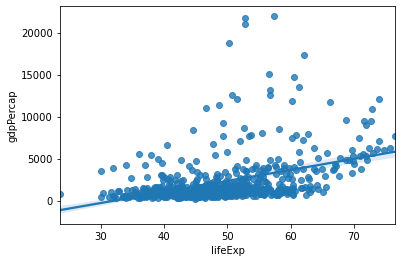

In [42]:
# Create a visualization
sns.regplot(data=df_Africa, x='lifeExp', y='gdpPercap')

#### Lineplot:
- Seaborn allows you to easily put a dataframe as input and it will recognize the categoriez you want to plot.  

#### What for?
A lineplot intends to show a linera pattern over the axis X, time is often commin.  

<AxesSubplot:xlabel='year'>

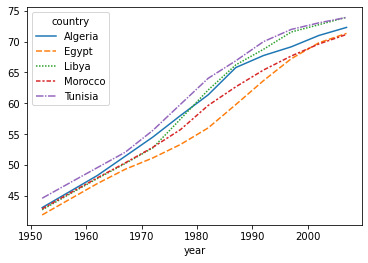

In [43]:
# Making a list of the countries I want to filter
north_africa = ['Algeria','Morocco','Tunisia','Libya','Egypt']

# Create a filtered subset including only the countries of my list
subset_north_africa = summary_Africa[summary_Africa.index.isin(north_africa)].T

# input my subset in the lineplot function of Seaborn
sns.lineplot(data = subset_north_africa)

---
## EXERCISES

+ _1. When we print `my_list` and `my_array` it appears to produce the same result. How would you check the type of data structure for each one?_

```python
my_list = [11, 12, 33]
print(my_list)

my_array = np.array([11, 12, 33])
print(my_array)
```
___

+ _2. Let's say that I want to import the whole stats library and then use the Uniform distribution (which is part of the stats library)_

```python
import scipy.stats as stats
```

Why is the following function not working? Make the appropiate changes to fix the problem.

```python
uniform.rvs(size=100)
```
___

+ _3. Given the following vector in an array form. Explore why it cannot be sampled. How do you fix this?_

```python
V = np.array([0, 1, 2, 3, 4, 5])
random.sample(V, 2) 
```
___

+ _6. Create a list with 5 elements of your wish. Then write a code that will take a sample corresponding to the 20% total amount of elements

Hint: you can use `len()` function
___

+ _7. Read the gapminder data again. Which one of the following query functions is going to work and why?_

```python
df.query('year == "1992" ')

df.query('year == 1992 ')

df.query('year = "1992" ')
```
___


+ _8. Select the column `continent` from the `df` dataframe with the command `df['continent']`, and call it `my_column`_

_What would be the purpose of the following function?:_ 

```python
my_column.unique()
```

___

+ _9. We did a Filter of gapminder by creating a subset `Europe 2007`, create another data Filter for `Europe` but this time for the year `1952`._  

_What is the average life expectancy for 1952 and 2007? How much has changed?_
___

+ _10. We did an Aggregation of gapminder by pivoting `african countries` and `years`. Create another data Aggregation but now for `Asia`._  
___

+ _11. Reproduce the Lineplot example, this time you will select Japan, China, North Korea and South Korea

Comment the results
._

___